# T shaped object mass and fric_coeff profile

In [1]:
import os
import sys
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
canvas_size=(600, 1000)
canvas = 255 * np.ones((canvas_size[0], canvas_size[1], 3), dtype='uint8')
p, radius, color, thickness = (200, 50), 20, (255, 0, 0), -1

canvas = cv2.circle(canvas, p, radius, color, thickness)

cv2.imwrite('tmp.jpg', cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

True

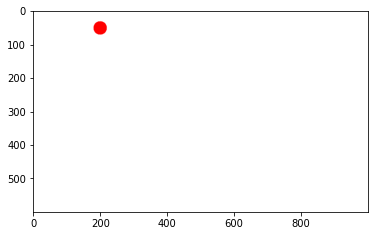

In [11]:
plt.imshow(canvas)

In [1]:
import os
import sys

import time
import math
from math import sin, cos
import cv2
import pickle
import random
import pygame
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch
from torch.autograd import Variable

from lcp_physics.physics.bodies import Circle, Composite
from lcp_physics.physics.constraints import TotalConstraint, FixedJoint
from lcp_physics.physics.forces import ExternalForce, Gravity, vert_impulse, hor_impulse
from lcp_physics.physics.utils import Defaults, plot, reset_screen, Recorder, rel_pose
from lcp_physics.physics.world import World, run_world, run_world_batch
from lcp_physics.physics.action import random_action
from lcp_physics.physics.sim import SimSingle

temp = pickle.load(open('temp.pkl', 'rb'))
mass_est, action_hist = temp['mass_est'], temp['actions']

TIME = 2
DT = Defaults.DT
DEVICE = Defaults.DEVICE
ROOT = os.path.abspath('.')

pygame.init()
width, height = 1000, 600
screen = pygame.display.set_mode((width, height), pygame.DOUBLEBUF)
screen.set_alpha(None)
pygame.display.set_caption('2D Engine')
reset_screen(screen)

np.random.seed(1)

object_names = ['hammer', 'driller', 'rod1', 'rod2']
obj_name = object_names[0]
mass_img_path = os.path.join(ROOT, 'fig/%s_mass.png'%obj_name)
bottom_fric_img_path = os.path.join(ROOT, 'fig/%s_fric.png'%obj_name)

# initializa sim 
sim = SimSingle.from_img(mass_img_path, bottom_fric_img_path, particle_radius=10, 
                hand_radius=20)
sim.mass_est = mass_est
sim.bottom_fric_est = sim.bottom_fric_gt

target_list = torch.tensor([[1.9, 300, 100],
                            [0.3, 700, 300],
                            [-2.9, 650, 400],
                            [-1.1, 550, 150],
                            [2.5, 200, 400]]).float()
idx = 0

step_size = torch.tensor([0.1, 20, 20]).float()
epsilon = 10
batch_size = 10

# init the composite at center, extract particle positions
target_pose = target_list[idx].reshape(-1)
target_particle_pos = sim.transform_particles(target_pose[0], target_pose[1:])
start_pose = torch.tensor([0, 500, 300]).float()
start_particle_pos = sim.transform_particles(start_pose[0], start_pose[1:])
curr_particle_pos = start_particle_pos

pygame 2.0.1 (SDL 2.0.14, Python 3.6.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


/home/jc/Env/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [4]:
action_hist = [[np.array([569.93998189, 308.94550803]), np.array([-0.8934457 ,  0.44917121])],
             [np.array([811.53360577, 349.38378772]), np.array([-0.99330562,  0.11551576])],
             [np.array([785.92458388, 325.19768959]), np.array([-0.97470618,  0.2234901 ])],
             [np.array([504.21378704, 428.3502277 ]), np.array([-0.92716287, -0.3746585 ])],
             [np.array([473.9537997, 290.2962263]), np.array([-0.99936795, -0.03554865])],
             [np.array([440.15060285, 311.1121647 ]), np.array([-0.80660765,  0.59108723])],
             [np.array([674.01587634, 274.67227902]), np.array([-0.78424176,  0.62045534])],
             [np.array([416.95689063, 435.00074796]), np.array([-0.66022972, -0.7510637 ])],
             [np.array([604.32278206, 374.09776176]), np.array([-0.11729961, -0.99309659])],
             [np.array([350.55484036, 465.9374728 ]), np.array([-0.24005328, -0.97075969])],
             [np.array([333.34163736, 432.2783144 ]), np.array([-0.10827356, -0.99412113])],
             [np.array([380.84801288, 198.08646247]), np.array([-0.99967629, -0.02544271])],
             [np.array([318.50706602, 403.5434463 ]), np.array([-0.1224705 , -0.99247217])],
             [np.array([525.33514517, 211.63445889]), np.array([0.03209285, 0.9994849 ])],
             [np.array([509.31956324, 240.0754092 ]), np.array([-0.11016716,  0.99391305])],
             [np.array([609.73672896, 358.6859215 ]), np.array([-0.96719646, -0.25402954])],
             [np.array([558.27448533, 385.08439891]), np.array([-0.24472445, -0.96959267])],
             [np.array([237.05328599, 270.50803855]), np.array([0.99519062, 0.09795739])],
             [np.array([301.28635037, 377.63002813]), np.array([ 0.08540366, -0.99634641])],
             [np.array([532.86468741, 231.93708727]), np.array([-0.22780319,  0.9737072 ])],
             [np.array([340.93229857, 303.42708701]), np.array([-0.77697714, -0.62952882])],
             [np.array([578.48978543, 357.60578657]), np.array([-0.87880027, -0.47718978])],
             [np.array([232.86589128, 307.59288881]), np.array([ 0.47334072, -0.8808794 ])],
             [np.array([372.39209106, 168.19045977]), np.array([-0.9989387 ,  0.04605937])],
             [np.array([281.73727596, 271.62143481]), np.array([-0.84554821, -0.53389907])],
             [np.array([272.64465112, 243.91131401]), np.array([-0.07662474, -0.99706   ])],
             [np.array([477.2461319 , 287.15277886]), np.array([-0.71206021,  0.7021184 ])],
             [np.array([458.88550174, 338.27810585]), np.array([-0.83089006,  0.55643666])],
             [np.array([349.52586928, 197.06183302]), np.array([-0.91687685,  0.39917016])],
             [np.array([334.45075779, 450.6979124 ]), np.array([-0.3151907 , -0.94902837])],
             [np.array([362.54900184, 343.50808267]), np.array([-0.95035392,  0.31117108])],
             [np.array([191.41242936, 187.45970432]), np.array([-0.03601856, -0.9993511 ])],
             [np.array([295.34241181, 202.03429116]), np.array([-0.99999261, -0.00384585])],
             [np.array([258.13305157, 377.64511095]), np.array([-0.99712908, -0.07572053])],
             [np.array([163.53060477, 143.0297514 ]), np.array([ 0.53449008, -0.84517476])]]


[[array([569.93998189, 308.94550803]), array([-0.8934457 ,  0.44917121])],
 [array([811.53360577, 349.38378772]), array([-0.99330562,  0.11551576])],
 [array([785.92458388, 325.19768959]), array([-0.97470618,  0.2234901 ])],
 [array([504.21378704, 428.3502277 ]), array([-0.92716287, -0.3746585 ])],
 [array([473.9537997, 290.2962263]), array([-0.99936795, -0.03554865])],
 [array([440.15060285, 311.1121647 ]), array([-0.80660765,  0.59108723])],
 [array([674.01587634, 274.67227902]), array([-0.78424176,  0.62045534])],
 [array([416.95689063, 435.00074796]), array([-0.66022972, -0.7510637 ])],
 [array([604.32278206, 374.09776176]), array([-0.11729961, -0.99309659])],
 [array([350.55484036, 465.9374728 ]), array([-0.24005328, -0.97075969])],
 [array([333.34163736, 432.2783144 ]), array([-0.10827356, -0.99412113])],
 [array([380.84801288, 198.08646247]), array([-0.99967629, -0.02544271])],
 [array([318.50706602, 403.5434463 ]), array([-0.1224705 , -0.99247217])],
 [array([525.33514517, 211.

In [5]:
for i, action in enumerate(action_hist):
    curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
    composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                            sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
    world = sim.make_world(composite_body, action)
    rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
    run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)
    curr_particle_pos = composite_body.get_particle_pos()
    
    dist = torch.mean(torch.norm(target_particle_pos - 
                                 curr_particle_pos, dim=1)).item()
    print('Step: %d, distance: %f'%(i, dist))

  2 / 2  30.0 Step: 0, distance: 451.353943
  2 / 2  30.0 Step: 1, distance: 432.888794
  2 / 2  30.0 Step: 2, distance: 410.214600
  2 / 2  30.0 Step: 3, distance: 382.733063
  2 / 2  30.0 Step: 4, distance: 364.294586
  2 / 2  30.0 Step: 5, distance: 358.844849
  2 / 2  30.0 Step: 6, distance: 346.827362
  2 / 2  30.0 Step: 7, distance: 309.318756
  2 / 2  30.0 Step: 8, distance: 305.995178
  2 / 2  30.0 Step: 9, distance: 288.559387
  2 / 2  30.0 Step: 10, distance: 273.736725
  2 / 2  30.0 Step: 11, distance: 266.134857
  2 / 2  30.0 Step: 12, distance: 256.801270
  2 / 2  30.0 Step: 13, distance: 255.251923
  2 / 2  30.0 Step: 14, distance: 253.110565
  2 / 2  30.0 Step: 15, distance: 234.157974
  2 / 2  30.0 Step: 16, distance: 235.017761
  2 / 2  30.0 Step: 17, distance: 251.656036
  2 / 2  30.0 Step: 18, distance: 239.690063
  2 / 2  30.0 Step: 19, distance: 234.825958
  2 / 2  30.0 Step: 20, distance: 214.193680
  2 / 2  30.0 Step: 21, distance: 194.159866
  2 / 2  30.0 Step: 

In [5]:
action = [np.array([569.93998189, 308.94550803]), np.array([-0.8934457 ,  0.44917121])]
theta = 0.2
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 448.598206


In [6]:
curr_particle_pos = composite_body.get_particle_pos()

In [7]:
action = [np.array([813, 355]), np.array([-0.99330562,  0.11551576])]
theta = -0
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 414.400360


In [8]:
curr_particle_pos = composite_body.get_particle_pos()

In [9]:
action = [np.array([515, 415]), np.array([-0.97470618,  0.2234901 ])]
theta = 0.9
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 385.110657


In [10]:
curr_particle_pos = composite_body.get_particle_pos()

In [11]:
action = [np.array([747, 355]), np.array([-0.99330562,  0.11551576])]
theta = 0
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 343.396240


In [12]:
curr_particle_pos = composite_body.get_particle_pos()

In [13]:
action = [np.array([698, 325]), np.array([-0.99330562,  0.11551576])]
theta = -0.4
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 318.087280


In [14]:
curr_particle_pos = composite_body.get_particle_pos()

In [15]:
action = [np.array([657.5, 390]), np.array([-0.99330562,  0.11551576])]
theta = 0
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 294.471313


In [16]:
curr_particle_pos = composite_body.get_particle_pos()

In [17]:
action = [np.array([630.8, 361]), np.array([-0.99330562,  0.11551576])]
theta = -0.1
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 278.989014


In [18]:
curr_particle_pos = composite_body.get_particle_pos()

In [19]:
action = [np.array([328, 427]), np.array([-0.99330562,  0.11551576])]
theta = 0.6
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 250.926041


In [20]:
curr_particle_pos = composite_body.get_particle_pos()

In [21]:
action = [np.array([295, 383.5]), np.array([-0.99330562,  0.11551576])]
theta = 0.8
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 223.720093


In [22]:
curr_particle_pos = composite_body.get_particle_pos()

In [23]:
action = [np.array([529, 442]), np.array([-0.99330562,  0.11551576])]
theta = 0
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 204.023529


In [24]:
curr_particle_pos = composite_body.get_particle_pos()

In [25]:
action = [np.array([228, 355]), np.array([-0.99330562,  0.11551576])]
theta = 0.9
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 170.462891


In [26]:
curr_particle_pos = composite_body.get_particle_pos()

In [27]:
action = [np.array([190, 322]), np.array([-0.99330562,  0.11551576])]
theta = 1.3
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 150.574371


In [28]:
curr_particle_pos = composite_body.get_particle_pos()

In [29]:
action = [np.array([170, 298]), np.array([-0.99330562,  0.11551576])]
theta = 1.6
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 125.967949


In [30]:
curr_particle_pos = composite_body.get_particle_pos()

In [31]:
action = [np.array([264, 514]), np.array([-0.99330562,  0.11551576])]
theta = 1.56
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 96.819565


In [32]:
curr_particle_pos = composite_body.get_particle_pos()

In [33]:
action = [np.array([193, 225]), np.array([-0.99330562,  0.11551576])]
theta = 1.7
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 69.153961


In [34]:
curr_particle_pos = composite_body.get_particle_pos()

In [45]:
action = [np.array([305, 202]), np.array([-0.99330562,  0.11551576])]
theta = 0.3
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 49.980450


In [46]:
curr_particle_pos = composite_body.get_particle_pos()

In [55]:
action = [np.array([214, 451]), np.array([-0.99330562,  0.11551576])]
theta = 1.6
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 24.443266


In [56]:
curr_particle_pos = composite_body.get_particle_pos()

In [69]:
action = [np.array([247, 335]), np.array([-0.99330562,  0.11551576])]
theta = 1.1
action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                        sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
world = sim.make_world(composite_body, action)
rec = None
#     rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%step))
run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)

dist = torch.mean(torch.norm(target_particle_pos - 
                             composite_body.get_particle_pos(), dim=1)).item()
print('distance: %f'%(dist))

  2 / 2  30.0 distance: 15.953621


In [80]:
action_hist = [
    [np.array([569.93998189, 308.94550803]), np.array([-0.8934457 ,  0.44917121])],
    [np.array([813, 355]), np.array([-0.99330562,  0.11551576])],
    [np.array([515, 415]), np.array([-0.97470618,  0.2234901 ])],
    [np.array([747, 355]), np.array([-0.99330562,  0.11551576])],
    [np.array([698, 325]), np.array([-0.99330562,  0.11551576])],
    [np.array([657.5, 390]), np.array([-0.99330562,  0.11551576])],
    [np.array([630.8, 361]), np.array([-0.99330562,  0.11551576])],
    [np.array([328, 427]), np.array([-0.99330562,  0.11551576])],
    [np.array([295, 383.5]), np.array([-0.99330562,  0.11551576])],
    [np.array([529, 442]), np.array([-0.99330562,  0.11551576])],
    [np.array([228, 355]), np.array([-0.99330562,  0.11551576])],
    [np.array([190, 322]), np.array([-0.99330562,  0.11551576])],
    [np.array([170, 298]), np.array([-0.99330562,  0.11551576])],
    [np.array([264, 514]), np.array([-0.99330562,  0.11551576])],
    [np.array([193, 225]), np.array([-0.99330562,  0.11551576])],
    [np.array([305, 202]), np.array([-0.99330562,  0.11551576])],
    [np.array([214, 451]), np.array([-0.99330562,  0.11551576])],
    [np.array([247, 335]), np.array([-0.99330562,  0.11551576])]
]

theta_hist = [0.2, 0, 0.9, 0, -0.4, 0, -0.1, 0.6, 0.8, 0, 0.9, 1.3, 1.6, 1.56, 1.7, 0.3, 1.6, 1.1]


# init the composite at center, extract particle positions
target_pose = target_list[idx].reshape(-1)
target_particle_pos = sim.transform_particles(target_pose[0], target_pose[1:])
start_pose = torch.tensor([0, 500, 300]).float()
start_particle_pos = sim.transform_particles(start_pose[0], start_pose[1:])
curr_particle_pos = start_particle_pos

for i, action in enumerate(action_hist):
    theta = theta_hist[i]
    print(action, theta)
    action[1] = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) @ action[1]
    curr_pose = rel_pose(sim.particle_pos0, curr_particle_pos)
    composite_body = sim.init_composite_object(sim.particle_radius, sim.mass_est, 
                            sim.bottom_fric_gt, rotation=curr_pose[0], offset=curr_pose[1:])
    world = sim.make_world(composite_body, action)
#     rec = None
    rec = Recorder(DT, screen, path=os.path.join(ROOT, 'tmp/rrt_step%d'%i))
    run_world(world, run_time=TIME, screen=screen, recorder=rec, show_mass=True)
    curr_particle_pos = composite_body.get_particle_pos()
    
    dist = torch.mean(torch.norm(target_particle_pos - 
                                 curr_particle_pos, dim=1)).item()
    print('Step: %d, distance: %f'%(i, dist))

[array([569.93998189, 308.94550803]), array([-0.8934457 ,  0.44917121])] 0.2
  2 / 2  30.0 Step: 0, distance: 448.598206
[array([813, 355]), array([-0.99330562,  0.11551576])] 0
  2 / 2  30.0 Step: 1, distance: 414.400360
[array([515, 415]), array([-0.97470618,  0.2234901 ])] 0.9
  2 / 2  30.0 Step: 2, distance: 385.110657
[array([747, 355]), array([-0.99330562,  0.11551576])] 0
  2 / 2  30.0 Step: 3, distance: 343.396240
[array([698, 325]), array([-0.99330562,  0.11551576])] -0.4
  2 / 2  30.0 Step: 4, distance: 318.087280
[array([657.5, 390. ]), array([-0.99330562,  0.11551576])] 0
  2 / 2  30.0 Step: 5, distance: 294.471313
[array([630.8, 361. ]), array([-0.99330562,  0.11551576])] -0.1
  2 / 2  30.0 Step: 6, distance: 278.989014
[array([328, 427]), array([-0.99330562,  0.11551576])] 0.6
  2 / 2  30.0 Step: 7, distance: 250.926041
[array([295. , 383.5]), array([-0.99330562,  0.11551576])] 0.8
  2 / 2  30.0 Step: 8, distance: 223.720093
[array([529, 442]), array([-0.99330562,  0.1155

In [99]:
import cv2

frameSize = (424, 240)

base_dir = 'tmp/learn2slide_grad'
dl = os.listdir(os.path.join(ROOT, base_dir))
dl = [d for d in dl if os.path.isdir(os.path.join(ROOT, base_dir, d))]
dl.sort()
print(dl)

out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), 30, frameSize)

for d in dl:
    img_list = os.listdir(os.path.join(ROOT, base_dir, d))
    img_list.sort()
    
    for i in range(len(img_list)):
        im_path = os.path.join(ROOT, base_dir, d, img_list[i])
        img = cv2.imread(im_path)
        img = cv2.resize(img, frameSize, interpolation=cv2.INTER_AREA)
        out.write(img)

out.release()

['rrt_step00', 'rrt_step01', 'rrt_step02', 'rrt_step03', 'rrt_step04', 'rrt_step05', 'rrt_step06', 'rrt_step07', 'rrt_step08', 'rrt_step09', 'rrt_step10', 'rrt_step11', 'rrt_step12', 'rrt_step13', 'rrt_step14', 'rrt_step15', 'rrt_step16', 'rrt_step17']


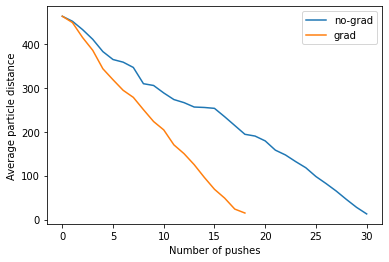

In [4]:
import numpy as np
import matplotlib.pyplot as plt

loss1 = np.array([462.4, 451, 432, 410, 382, 364, 358, 346, 309, 305, 288, 273, 266, 256, 255, 253, 234, 
                  214, 194, 190, 179, 158, 147, 132, 118, 98, 82, 65, 46, 28, 13])

loss2 = np.array([462.4, 448, 414, 385, 343, 318, 294, 278, 250, 223, 204, 170, 150, 125, 96, 69, 49, 24, 15])

plt.plot(loss1)
plt.plot(loss2)
plt.xlabel('Number of pushes')
plt.ylabel('Average particle distance')
plt.legend(['no-grad', 'grad'])
plt.savefig('tmp.jpg', dpi='figure', bbox_inches=None, pad_inches=0)